# DATA EXPLORATION AND MODIFICATION

IMPORT THE RELEVANT MODULES

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [25]:
df=pd.read_csv('combined_df.csv')

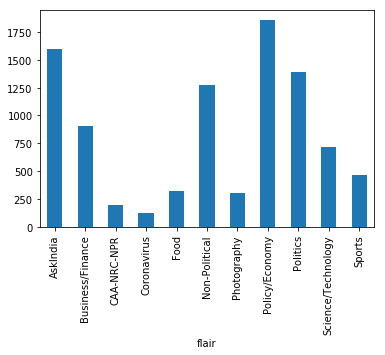

In [35]:
df.groupby('flair').count()['title'].plot(kind='bar')

The Policy/Economy flair has relatively the most number of flairs and most number of posts with no comments. We can safely drop these posts without affecting the database much

In [ ]:
indexvalues=list(df[(df['comments'].isna()) & (df['flair']=='Policy/Economy')].index)

In [ ]:
df=df.drop(indexvalues,axis=0)

In [6]:
df.isna().sum()

author             0
comment_length     0
comments           0
comms_num          0
flair              0
id                 0
numerical_flair    0
score              0
stem_comments      0
stemmed_titles     0
timestamp          0
title              0
title_length       0
url                0
dtype: int64

In [ ]:
df['timestamp']=df['timestamp'].fillna(df['created'])

In [ ]:
df=df.drop('created',axis=1)

In [ ]:
df.head()

The empty comments datapoints belong to flairs with relatively low datapoints. We will flag these comments as "No comments " rather than deleting these datapoints

In [ ]:
def comment_func(x):
    if(type(x)!=str):
        return "No comments"
    else:
        return x

In [ ]:
df['comments']=df['comments'].apply(lambda x: comment_func(x))

In [ ]:
df['stem_comments']=df['stem_comments'].apply(lambda x:comment_func(x))

In [ ]:
df.head()

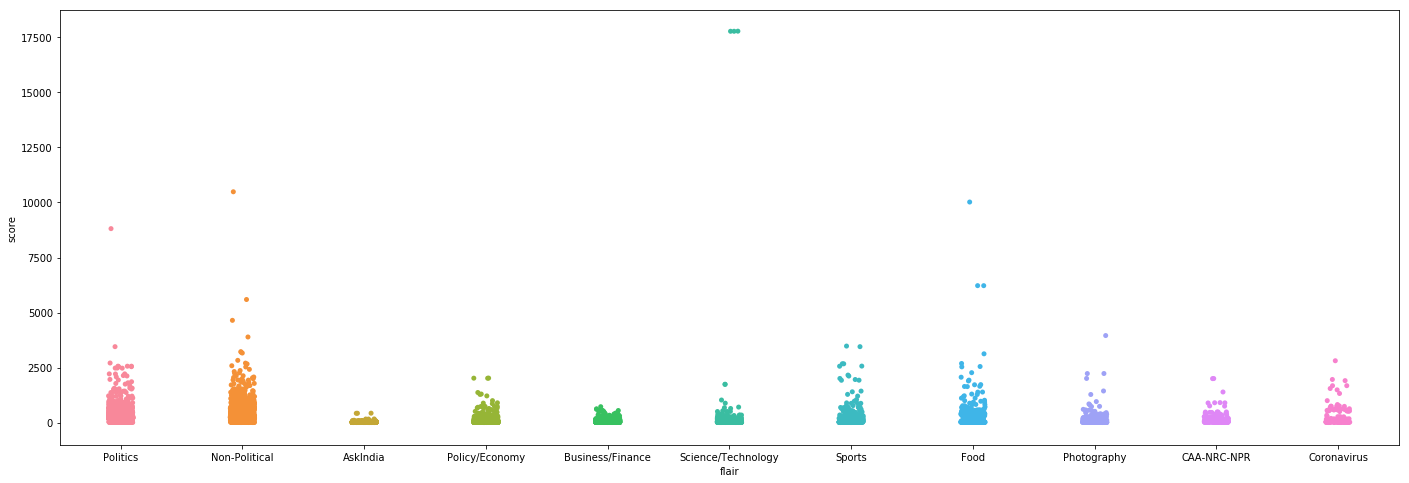

In [31]:
plt.figure(figsize=(24,8))
sns.stripplot(x='flair',y='score',data=df)

Scores are not a good parameter. They are relatively equal for all posts except a few outliers in some categories with relatively high scores

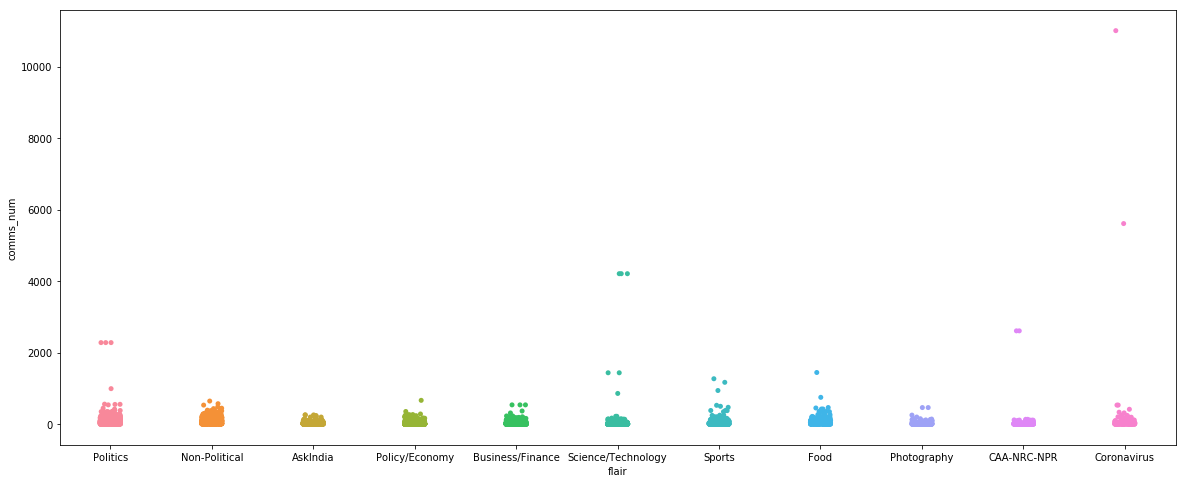

In [30]:
plt.figure(figsize=(20,8))
sns.stripplot(x='flair',y='comms_num',data=df)

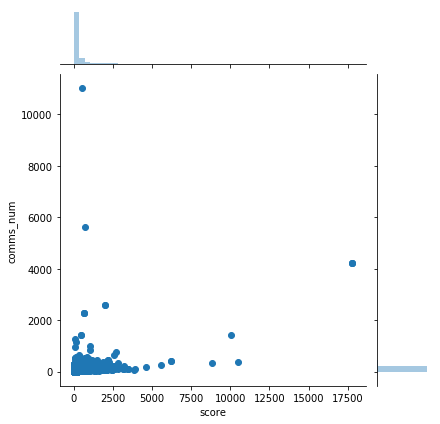

In [8]:
sns.jointplot(x='score',y='comms_num',data=df)

In [9]:
score_eval=df[df['score']<1000]

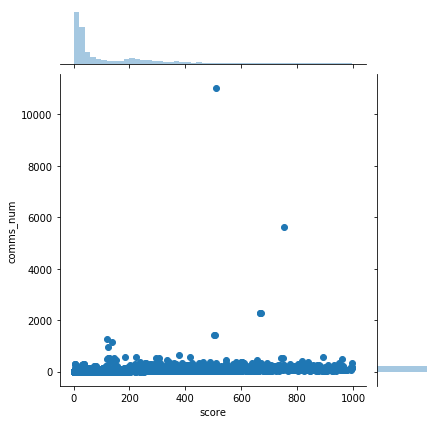

In [10]:
sns.jointplot(x='score',y='comms_num',data=score_eval)

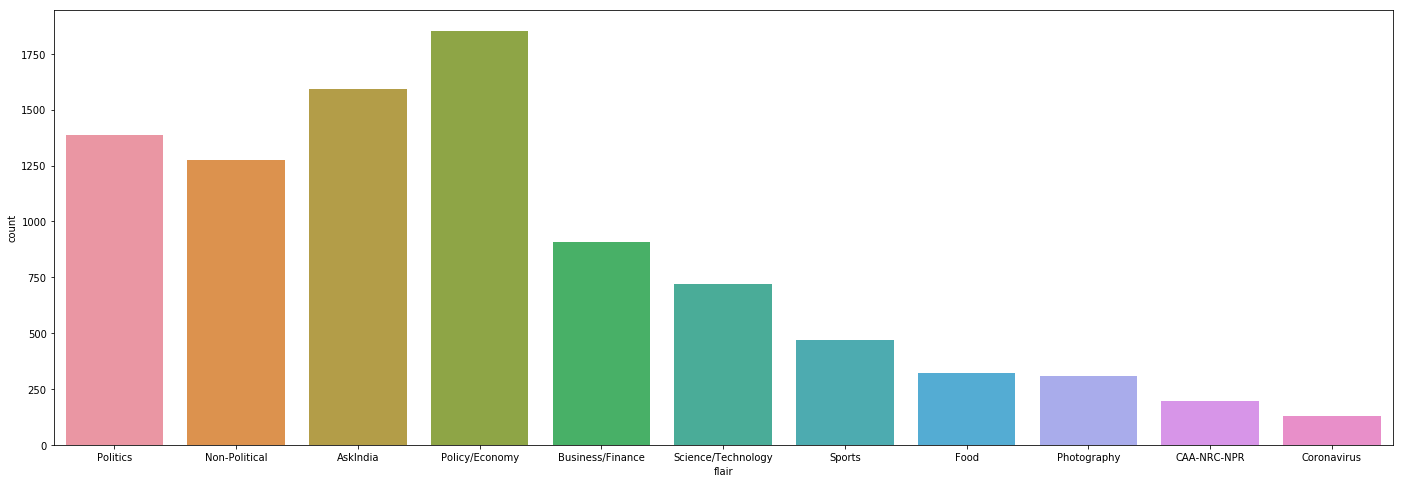

In [11]:
plt.figure(figsize=(24,8))
sns.countplot(x='flair',data=df)

In [ ]:
df.to_csv('combined_df.csv',index=False)

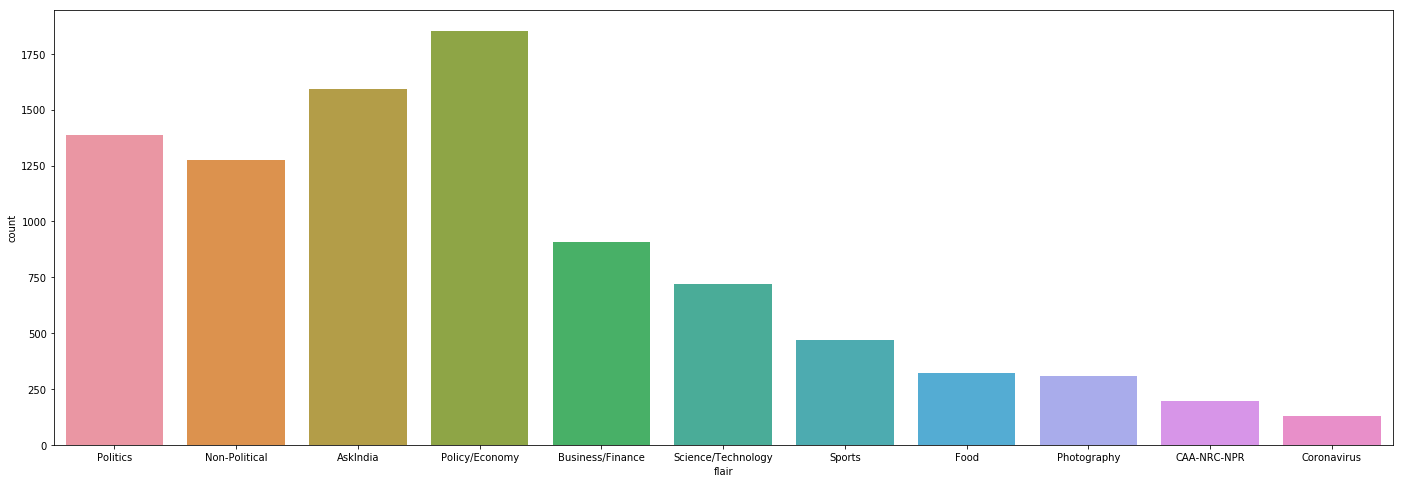

In [12]:
plt.figure(figsize=(24,8))
sns.countplot(x='flair',data=df)

## DATA REDUCTION
Creating another database containing only the popular posts from each flairs for a more consistent word count.

In [13]:
df[(df['flair']=='Policy/Economy') & (df['score']>50)].shape

(595, 14)

In [14]:
indexes=df[(df['flair']=='Policy/Economy') & (df['score']<50)].index

In [15]:
temp=df.drop(indexes)

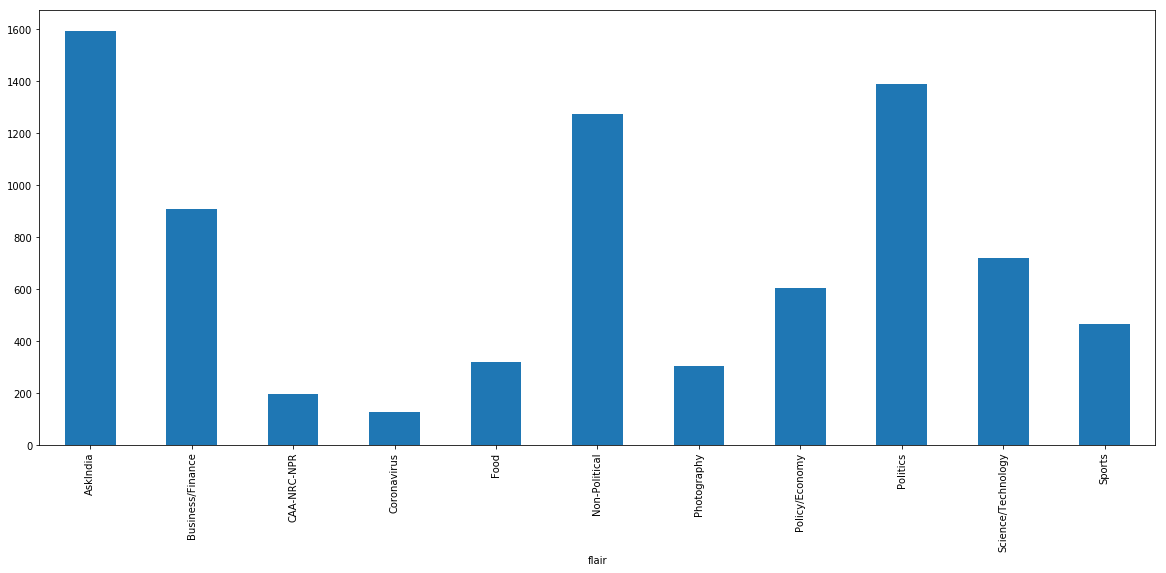

In [16]:
plt.figure(figsize=(20,8))
temp.groupby('flair').count()['title'].plot(kind='bar')

C:\Users\mihee\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


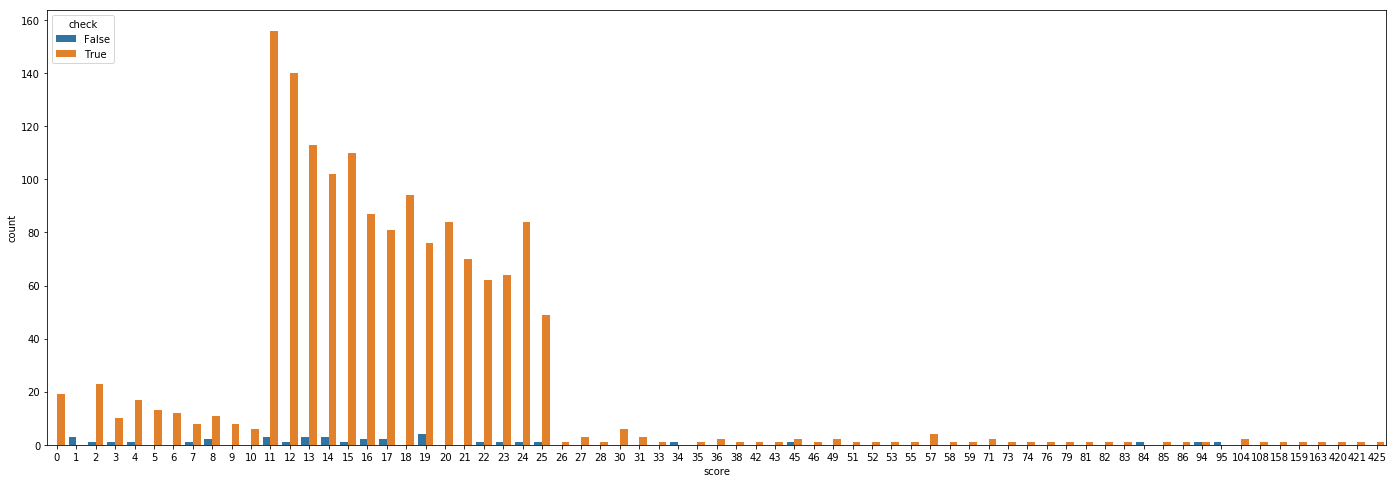

In [25]:
plt.figure(figsize=(24,8))
temp=df[df['flair']=='AskIndia']
def check(x):
    if (x=="No comments"):
        return False
    else:
        return True
temp['check']=temp['comments'].apply(lambda x: check(x))
sns.countplot(x=temp['score'],hue=temp['check'])

### For the AskIndia flair, most of the flairs are concentrated around scores 11-25. We can drop posts with scores less than this

In [34]:
indexes=df[(df['flair']=='AskIndia') & (df['score']<15)].index
df=df.drop(indexes)


In [66]:
indexes=df[(df['flair']=='Non-Political')& (df['score']<250)].index
df=df.drop(indexes)

In [54]:
indexes=df[(df['flair']=='Politics') & (df['score']<225)].index
df=df.drop(indexes)

In [57]:
indexes=df[(df['flair']=='Policy/Economy') & (df['score']<50)].index
df=df.drop(indexes)

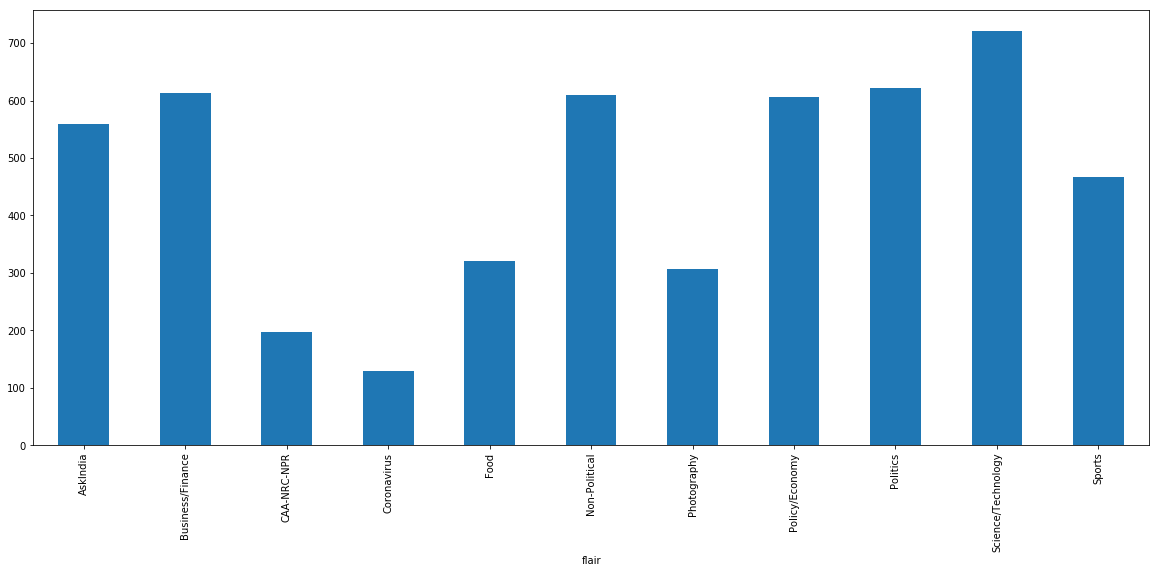

In [109]:
plt.figure(figsize=(20,8))
df.groupby('flair').count()['title'].plot(kind='bar')

In [68]:
df.to_csv('stripped_data.csv',index=False)

In [70]:
df[df['flair']=='Policy/Economy'].head()

,author,comment_length,comments,comms_num,flair,id,numerical_flair,score,stem_comments,stemmed_titles,timestamp,title,title_length,url
267,neoronin,422,He also said we need a government that is tra...,22,Policy/Economy,dgsrbf,3,149,also said nee govern transp numb tak 2 year pu...,unpopul new last day rind edit,2019-10-12 22:42:20,Unpopular News of the Last Few Days - r/india ...,53,https://www.reddit.com/r/india/comments/dgsrbf...
268,neoronin,1855,"See, I believe that not only this government ...",30,Policy/Economy,d3lrol,3,97,see believ govern every govern past decad resp...,unpopul new week rind edit,2019-09-13 21:01:54,Unpopular News of the Week - r/india Edition,44,https://www.reddit.com/r/india/comments/d3lrol...
271,Gavthi_Batman,0,No comments,3,Policy/Economy,eomee4,3,52,No comments,soc unrest bad econom list voic fut ind rathin...,2020-01-15 04:33:56,"""Social unrest is bad for the economy. We have...",207,https://twitter.com/ndtv/status/12170971095534...
272,azemda,922,"Actually, corona virus is a great excuse for ...",16,Policy/Economy,cp7sen,3,96,act coron vir gre excus bjp blam econom proble...,bottleneck ind econom compound policy first mo...,2019-08-12 18:34:05,Bottlenecks of Indian economy compounded by th...,81,https://bangaloremirror.indiatimes.com/bangalo...
276,abbawaddadu,12860,There's a great recent episode on Rajya Sabha...,21,Policy/Economy,fupeo0,3,83,ther gre rec episod rajy sabh tvs stat econom ...,would gon recess regardless vir part rant,2020-04-04 20:57:55,We would have gone into a recession regardless...,69,https://www.reddit.com/r/india/comments/fupeo0...


In [77]:
indexes=df[(df['flair']=='Non-Political')& (df['score']<325)].index
df=df.drop(indexes)

In [90]:
indexes=df[(df['flair']=='AskIndia')& (df['score']<19)].index
df=df.drop(indexes)

In [97]:
indexes=df[(df['flair']=='Business/Finance')& (df['score']<20)].index
df=df.drop(indexes)

In [108]:
indexes=df[(df['flair']=='Politics')& (df['score']<275)].index
df=df.drop(indexes)

In [110]:
df.to_csv('stripped_data.csv',index=False)

In [3]:
df2=pd.read_csv('stripped_data.csv')

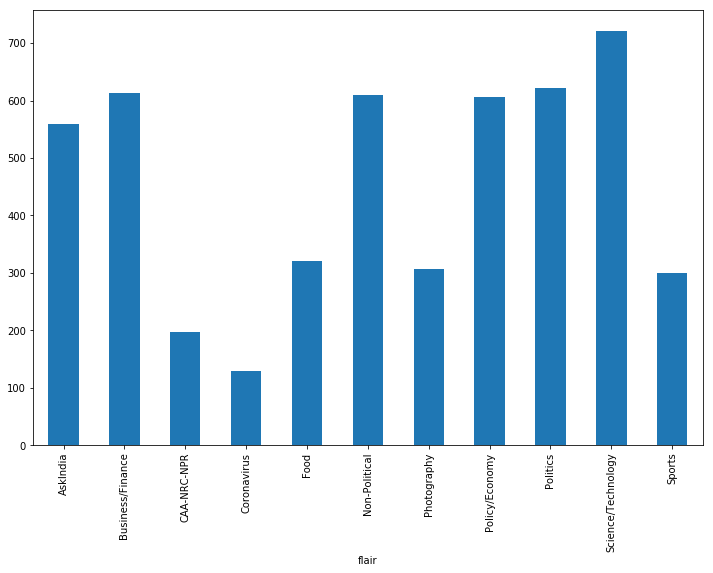

In [11]:
plt.figure(figsize=(12,8))
df2.groupby('flair').count()['title'].plot(kind='bar')

In [129]:
df2[df2['stem_comments']=='No comments'].groupby('flair').count()['title']

flair
AskIndia               6
Business/Finance       9
CAA-NRC-NPR           31
Coronavirus           26
Food                   9
Photography           16
Policy/Economy        21
Politics               5
Science/Technology    26
Sports                 6
Name: title, dtype: int64

## Reducing Data Points to average out number of posts for each flair

In [188]:
indexes=df2[(df2['stem_comments']=='No comments') &(df2['flair']=='Sports')].index
df2=df2.drop(indexes)

In [131]:
indexes=df2[(df2['stem_comments']=='No comments') &(df2['flair']=='Policy/Economy')].index

In [132]:
df2=df2.drop(indexes)

In [134]:
indexes=df2[(df2['stem_comments']=='No comments') &(df2['flair']=='Science/Technology')].index
df2=df2.drop(indexes)

In [175]:
indexes=df2[(df2['score']<30) &(df2['flair']=='Science/Technology')].index
df2=df2.drop(indexes)

In [178]:
indexes=df2[(df2['score']<450) &(df2['flair']=='Politics')].index
df2=df2.drop(indexes)

In [153]:
indexes=df2[(df2['score']<30) &(df2['flair']=='Business/Finance')].index
df2=df2.drop(indexes)

In [186]:
indexes=df2[(df2['score']<22) &(df2['flair']=='AskIndia')].index
df2=df2.drop(indexes)

In [162]:
indexes=df2[(df2['score']<450) &(df2['flair']=='Non-Political')].index
df2=df2.drop(indexes)

In [169]:
indexes=df2[(df2['score']<70) &(df2['flair']=='Policy/Economy')].index
df2=df2.drop(indexes)

In [191]:
indexes=df2[(df2['score']<50) &(df2['flair']=='Sports')].index
df2=df2.drop(indexes)

In [193]:
df2.to_csv('sec_strip_data.csv',index=False)

In [10]:
indexes=df2[(df2['score']<30) &(df2['flair']=='Sports')].index
df2=df2.drop(indexes)

In [13]:
sec_strip=pd.read_csv('sec_strip_data.csv')

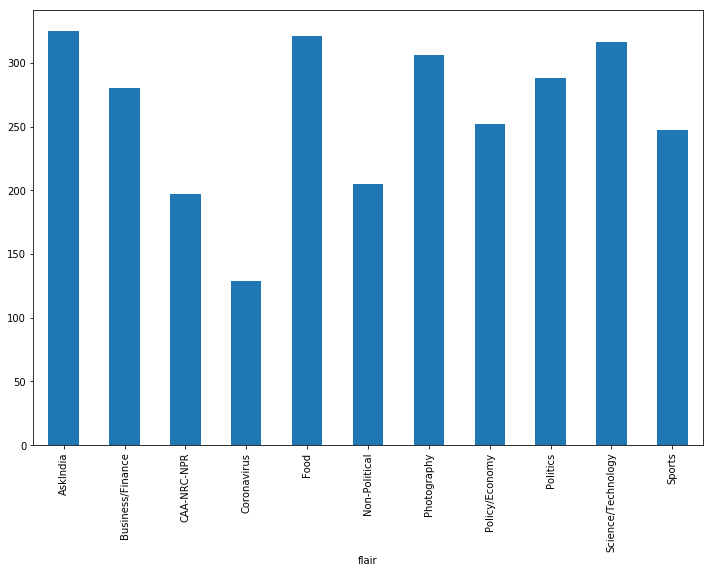

In [30]:
plt.figure(figsize=(12,8))
sec_strip.groupby('flair').count()['title'].plot(kind='bar')

In [19]:
indexes=sec_strip[(sec_strip['flair']=='Policy/Economy') & (sec_strip['score']<110)].index
sec_strip=sec_strip.drop(indexes)

In [23]:
indexes=sec_strip[(sec_strip['flair']=='Business/Finance') & (sec_strip['score']<50)].index
sec_strip=sec_strip.drop(indexes)

In [29]:
indexes=sec_strip[(sec_strip['flair']=='Non-Political') & (sec_strip['score']<750)].index
sec_strip=sec_strip.drop(indexes)

In [31]:
sec_strip.to_csv('sec_strip_data.csv',index=False)

## Searching for common words in flairs

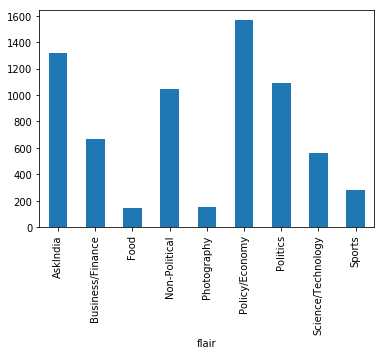

In [ ]:
concat.groupby('flair').count()['title'].plot(kind='bar')

In [58]:
df['title-comments-comb']=df['stemmed_titles']+df['stem_comments']
df[df['flair']=='Food'].head()

,author,comment_length,comments,comms_num,flair,id,numerical_flair,score,stem_comments,stemmed_titles,timestamp,title,title_length,url,processed_url,title-comments-comb
1594,anonymouse_2001,2821,"In Ernakulam, they are giving Italian food to...",421,Food,fqh8zl,7,6220,ernakulam giv it food malayal toddl cam ita ki...,migr work break off food sourc com,2020-03-28 23:30:42,Migrant worker breaks down while being offered...,72,https://v.redd.it/zsbcsrzqzdp41,v redd zsbcsrzqzdp,migr work break off food sourc comernakulam gi...
1595,Neglectedsince1994,5939,Welcome to Indian kitchens. This is universal...,69,Food,frstgc,7,414,welcom ind kitch univers way insist ful lil bi...,ban delh request peopl leav food accommod arra...,2020-03-31 04:56:45,A banner in Delhi requesting people not to lea...,109,https://i.redd.it/4wy2vgsjvtp41.jpg,redd wyvgsjvtp jpg,ban delh request peopl leav food accommod arra...
1596,hipporama,1304,Our building did this cool thing. They appoin...,80,Food,fmez1j,7,499,build cool thing appoint sabj wal tak ord us s...,amid coronavir restrict kejriw annount fre rat...,2020-03-22 02:59:27,"Amid coronavirus restrictions, Kejriwal announ...",85,https://m.hindustantimes.com/delhi-news/amid-c...,hindustantimes com delhi news amid coronavirus...,amid coronavir restrict kejriw annount fre rat...
1597,india_ko_vanakkam,706,> Central Zoo Authority writes to States and ...,33,Food,fvblal,7,316,cent zoo auth writ stat un territ spec supply ...,saharanp pol say tru tabligh jama peopl demand...,2020-04-05 23:43:09,Saharanpur Police says no truth in Tablighi Ja...,114,http://www.jantakareporter.com/india/saharanpu...,http www jantakareporter com india saharanpur ...,saharanp pol say tru tabligh jama peopl demand...
1598,BabaGyaanchod,1087,There are still thousands like them and all I...,37,Food,fp5ck6,7,927,stil thousand lik im abl bitch hopelesslynev f...,mumba bmc collab taj cat provid comply food ad...,2020-03-26 18:09:25,"Mumbai: BMC collaborated with Taj Caterers, wh...",162,https://i.imgur.com/edOtUTI.jpg,imgur com edotuti jpg,mumba bmc collab taj cat provid comply food ad...


In [75]:
def plot_word_count(df,column_name):
    CV=CountVectorizer()
    flairs=["Politics","Non-Political","AskIndia","Policy/Economy",'Business/Finance','Science/Technology','Sports','Food',
       'Photography','CAA-NRC-NPR','Coronavirus']
    for flair in flairs:
        flair_data=df[df['flair']==flair]
        vectorized_words=CV.fit_transform(flair_data[column_name]) 
        flair_count_df=pd.DataFrame(vectorized_words.toarray(),columns=CV.get_feature_names())
        sorted_count=pd.DataFrame(flair_count_df.sum().sort_values(ascending=False).head(25))
        plot_words([sorted_count],[flair])

def plot_words(dataframes, flairs):
    count = 0
    fig = plt.figure(figsize=(10,6))
    
    for d, dataframe in enumerate(dataframes):
        
        count += 1
        # Create the plot
        sns.barplot(
            x = 0,
            y = dataframe.index,
            data = dataframe,
            palette = "cubehelix"
        )
        plt.title(f" {flairs[d]}")
        plt.xlabel("Frequency")
        plt.show()
    

In [10]:
praw_df=pd.read_csv('reddit-india-final-dataset.csv')
pushshifts_df=pd.read_csv('pushshifts_data_extraction.csv')
concat=pd.concat([praw_df,pushshifts_df])

C:\Users\mihee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


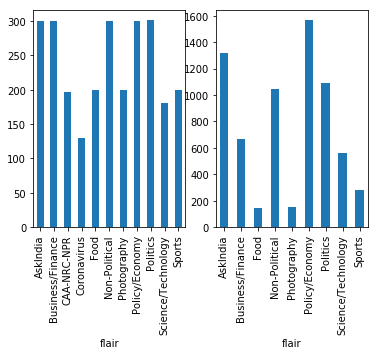

In [23]:

fig,axs=plt.subplots(1,2)
praw_df.groupby('flair').count()['title'].plot(kind='bar',ax=axs[0])
pushshifts_df.groupby('flair').count()['title'].plot(kind='bar',ax=axs[1])


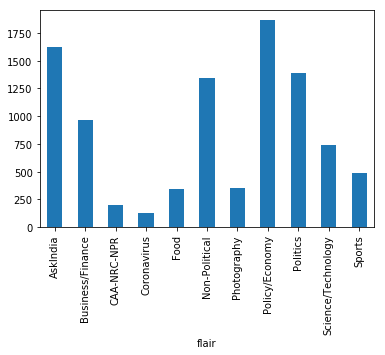

In [24]:
concat.groupby('flair').count()['title'].plot(kind='bar')

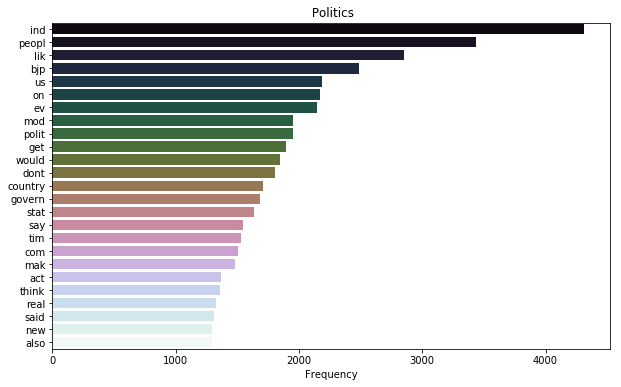

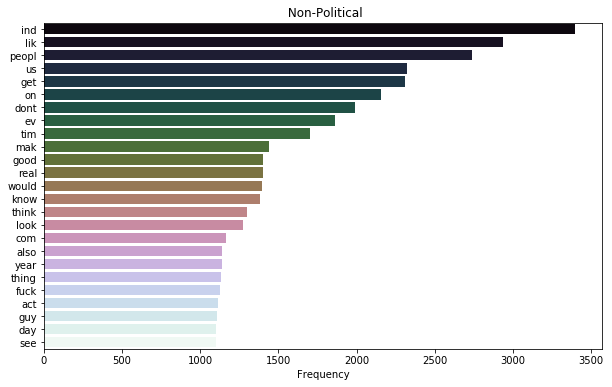

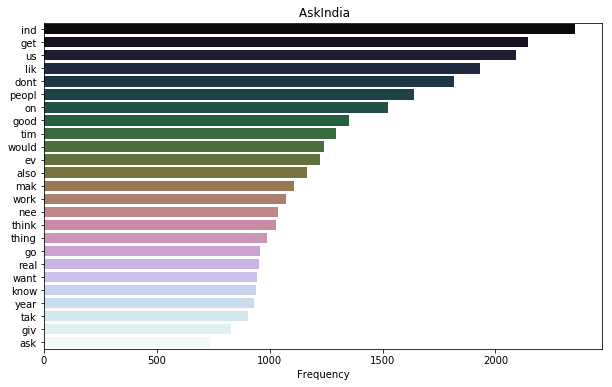

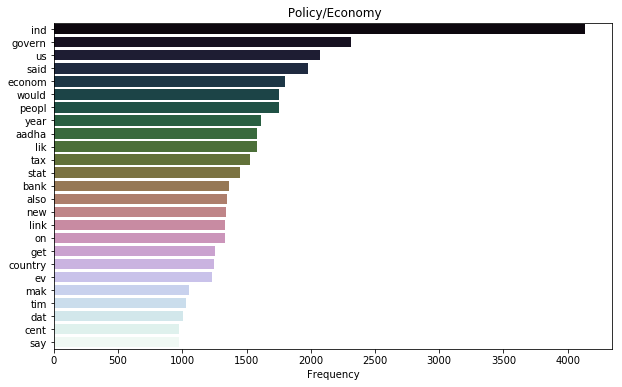

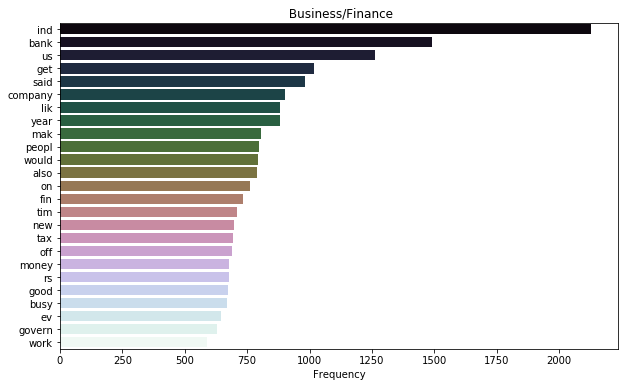

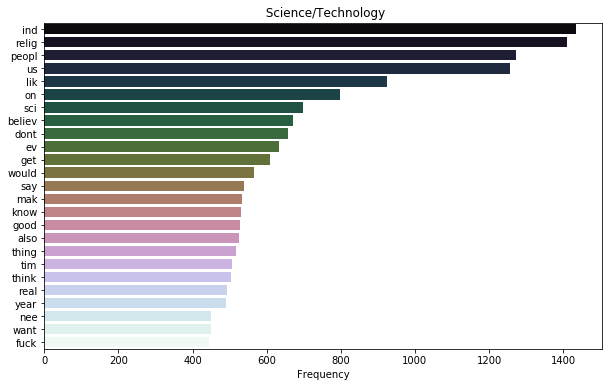

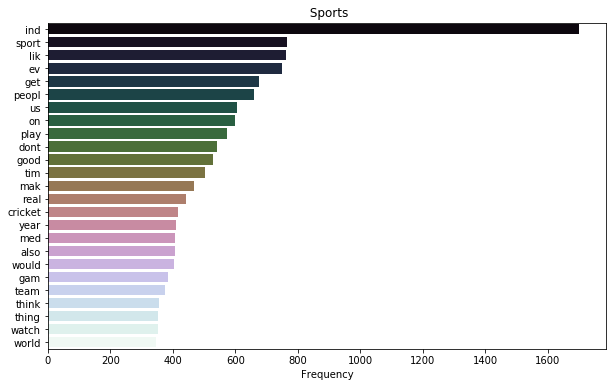

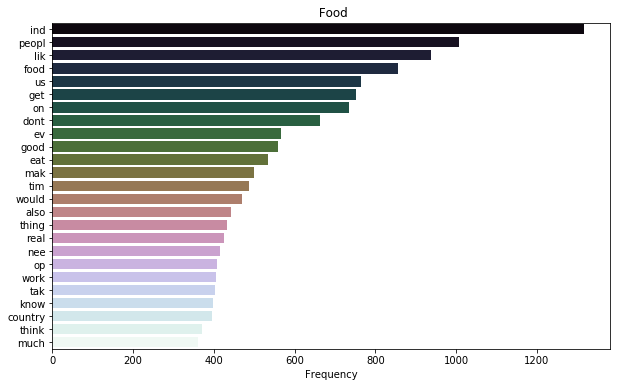

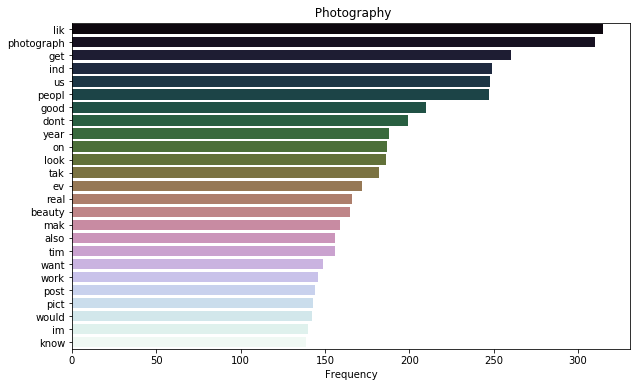

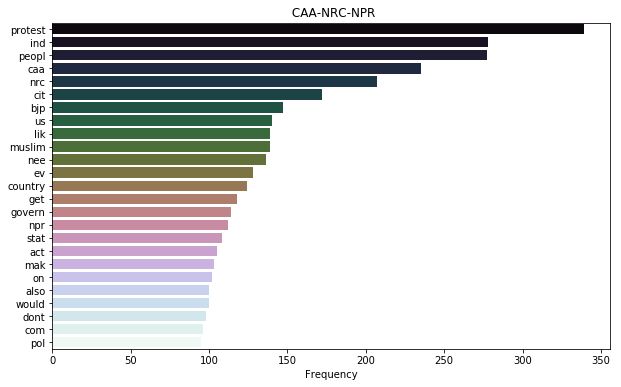

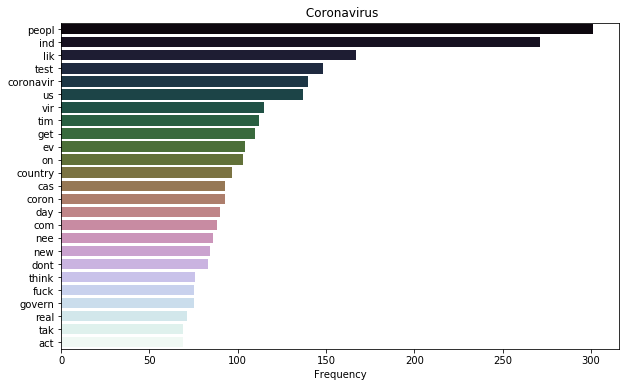

In [76]:
plot_word_count(concat,'title_comments_stem')

We will have to remove the common occurring words by adding it to our list of stopwords

### Searching for Common words in titles

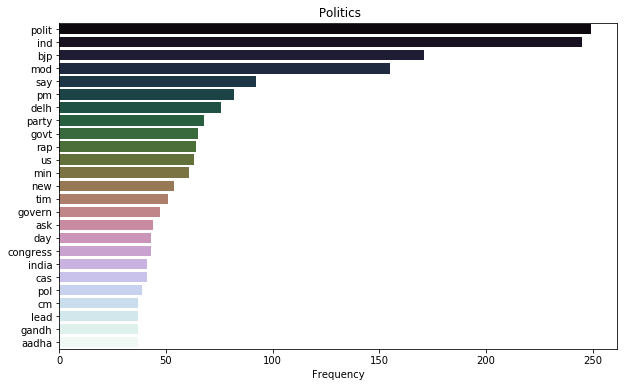

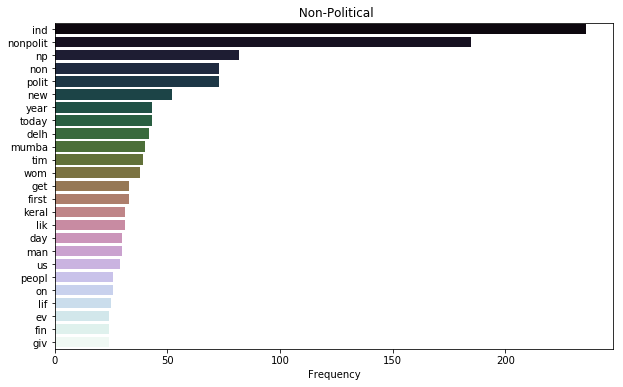

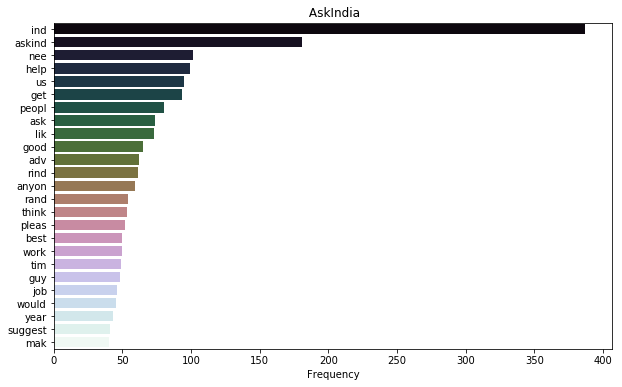

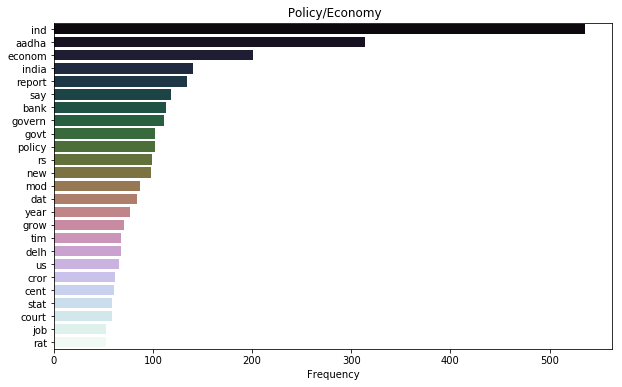

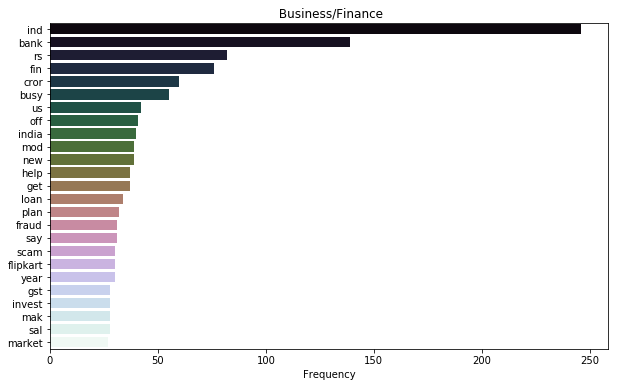

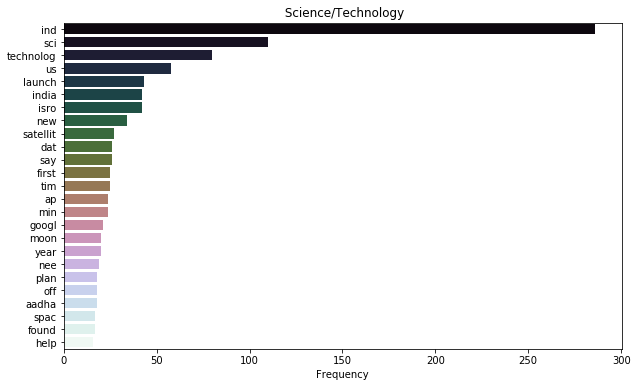

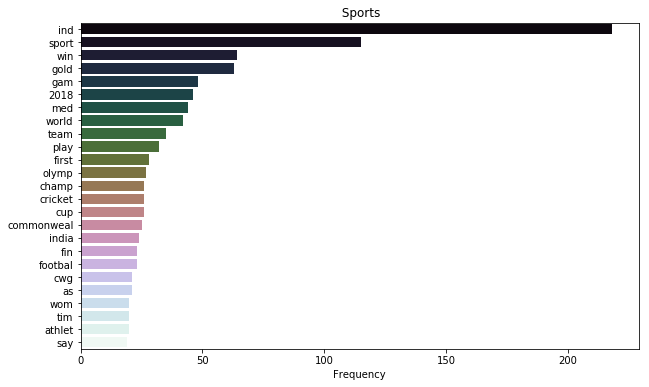

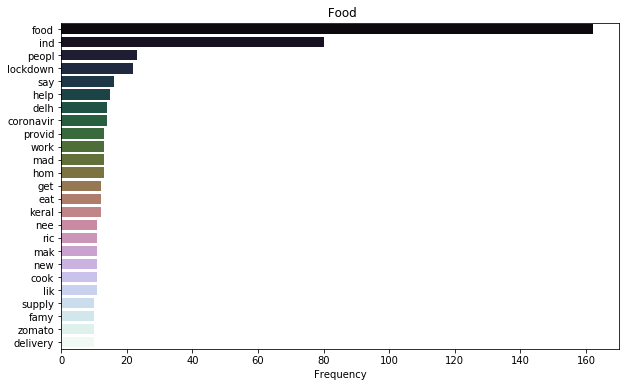

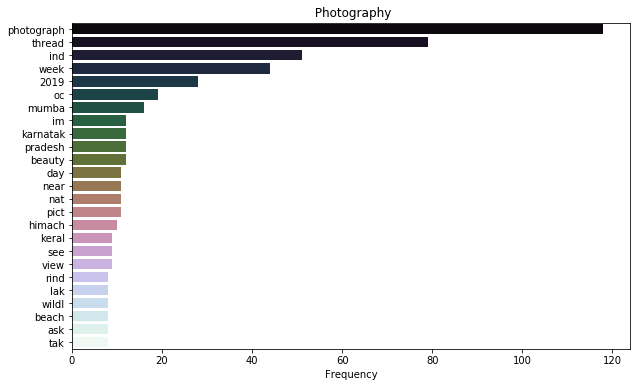

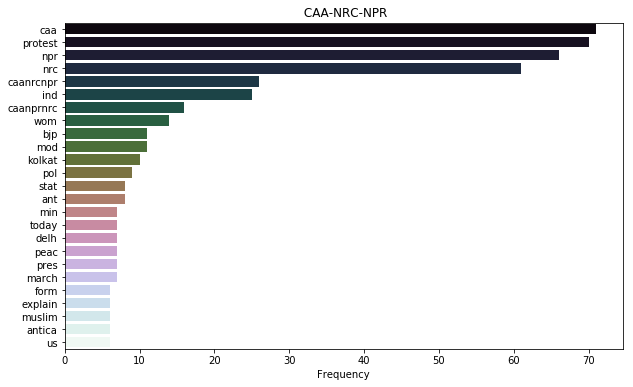

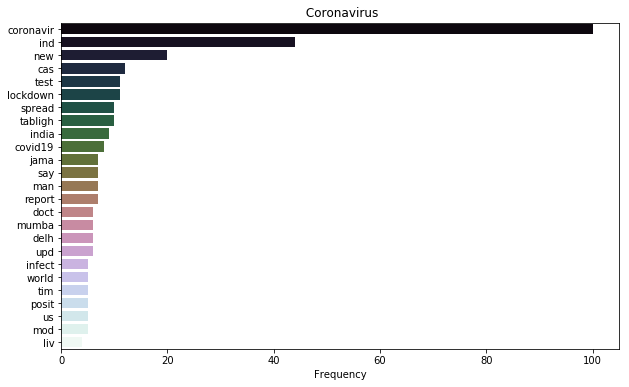

In [66]:
plot_word_count(concat,'stemmed_titles')

We will remove these common word occurrences from the title data

In [63]:
extended=['ind','india','peopl']

# Word Count after the removal of words

In [67]:
df2=pd.read_csv('combined_df.csv')
df2.head()

,author,comment_length,comments,comms_num,flair,id,numerical_flair,score,stem_comments,stemmed_titles,timestamp,title,title_length,url,processed_url,title_comments_stem,stemmed_url
0,chillinvillain122,2115,If there is anything positive in the fight ag...,73,Politics,futac9,0,196,anyth posit fight covid giv credit institut li...,pit commun polit party fuck stupid,2020-04-05 02:28:28,Pitting a community against a political party ...,64,https://www.reddit.com/r/india/comments/futac9...,www reddit com r india comments futac pitting ...,pit commun polit party stupidanyth posit fight...,r comments futac pitting community political p...
1,chillinvillain122,4631,What an incredibly narrow minded person. Our ...,73,Politics,futac9,0,198,incred narrow mind person gre grandfath nat pe...,pit commun polit party fuck stupid,2020-04-05 02:28:28,Pitting a community against a political party ...,64,https://www.reddit.com/r/india/comments/futac9...,www reddit com r india comments futac pitting ...,pit commun polit party stupidincred narrow min...,r comments futac pitting community political p...
2,hipporama,5391,So the argument is that the DMs could have co...,67,Politics,fpaj1w,0,404,argu dms could command pol arm forc didnt dms ...,hit backlash post lack med gear doct go sil so...,2020-03-27 01:47:25,Hit by backlash over posts on lack of medical ...,242,https://theprint.in/india/hit-by-backlash-over...,theprint india hit backlash posts lack medical...,hit backlash post lack med gear doct go sil so...,theprint hit backlash posts lack medical gear ...
3,aaluinsonaout,3828,I tend to agree with her. After the first Del...,146,Politics,ff8sth,0,731,tend agr first delh shoot arnab goswam republ ...,new polit party gav ful front pag ad popul new...,2020-03-08 20:06:11,A new political party gave a full front page a...,85,https://i.redd.it/yjo9wpy38el41.jpg,redd yjowpyel jpg,polit party gav ful front pag ad popul newspap...,redd yjowpyel jpg
4,I_can_believe_that,2148,Except Indira all of them loved dissent. They...,51,Politics,fs887w,0,43,exceiv indir lov diss spin back didn’t sold go...,i’ve cury polit think good job polit,2020-03-31 20:29:29,"I’ve been curious, which Indian politicians do...",98,https://www.reddit.com/r/india/comments/fs887w...,www reddit com r india comments fsw ive curiou...,i’ve cury polit job politexceiv indir lov diss...,r comments fsw ive curious indian politicians


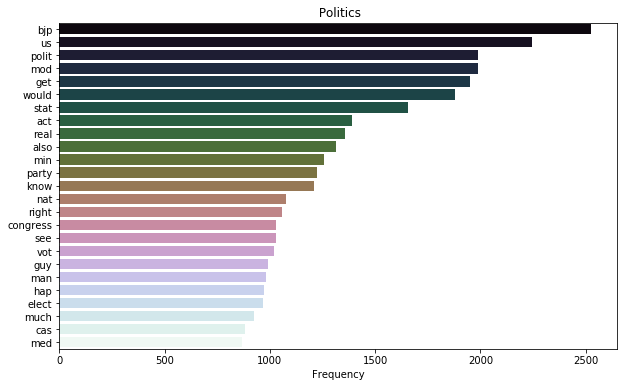

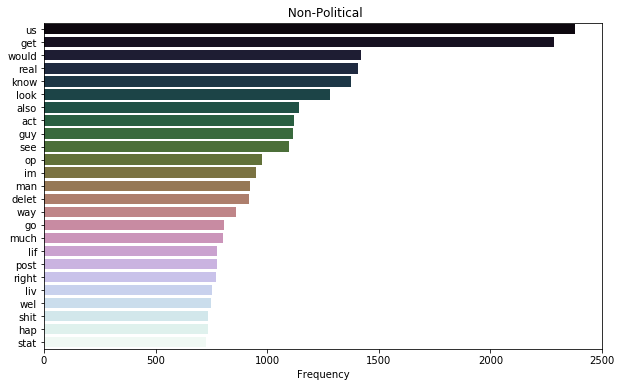

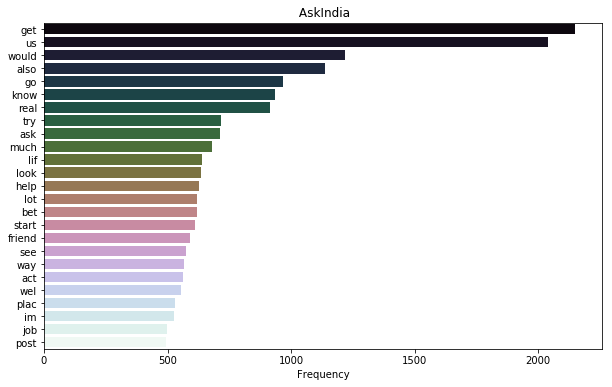

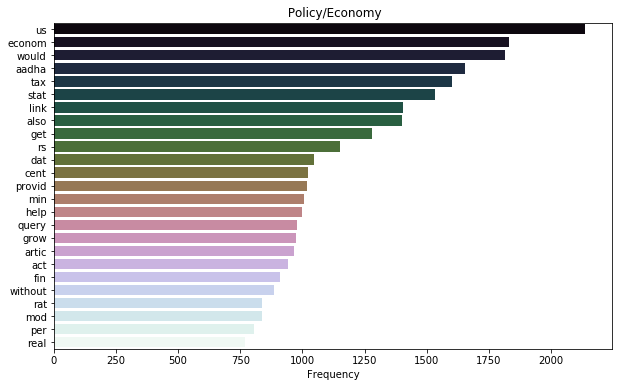

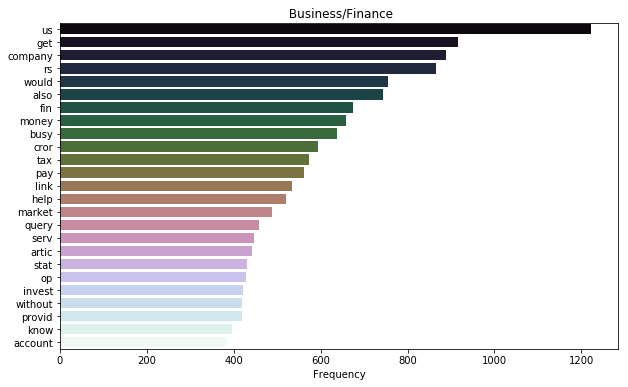

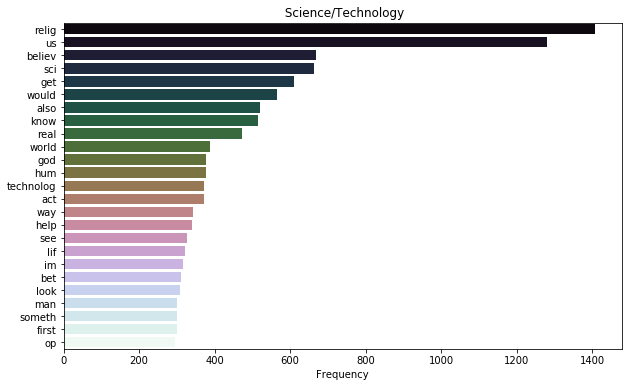

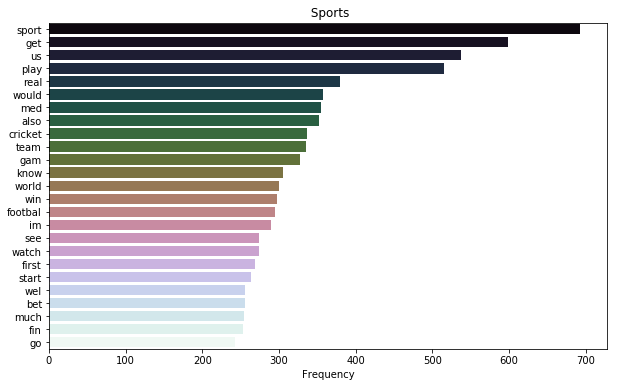

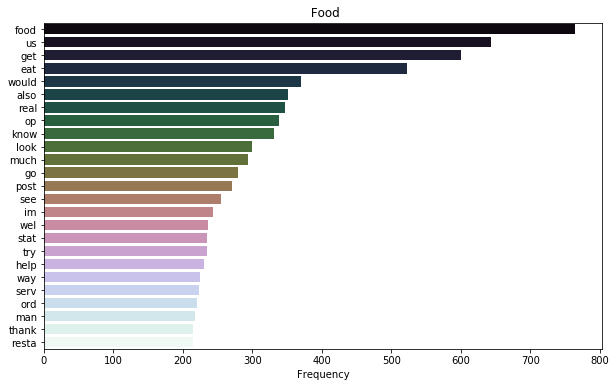

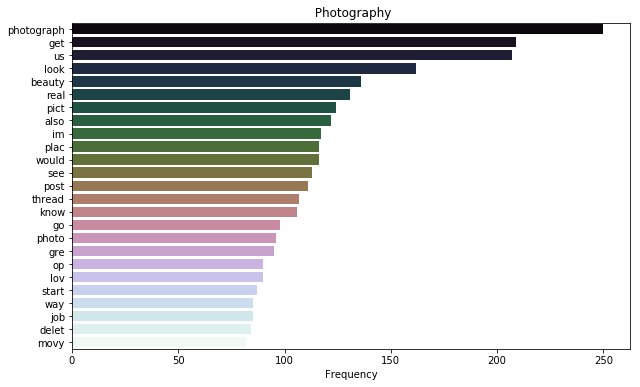

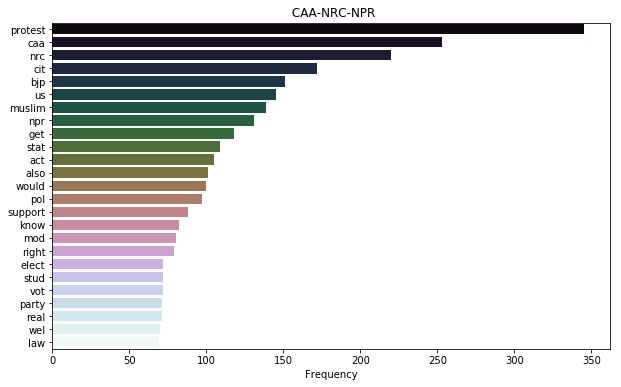

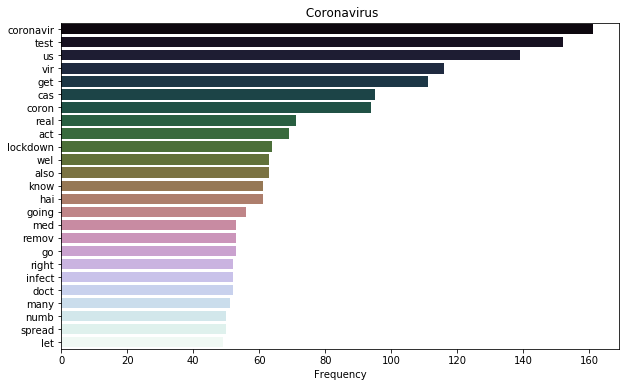

In [68]:
plot_word_count(df2,'title_comments_stem')

# Counting the Word Count of processed URLs

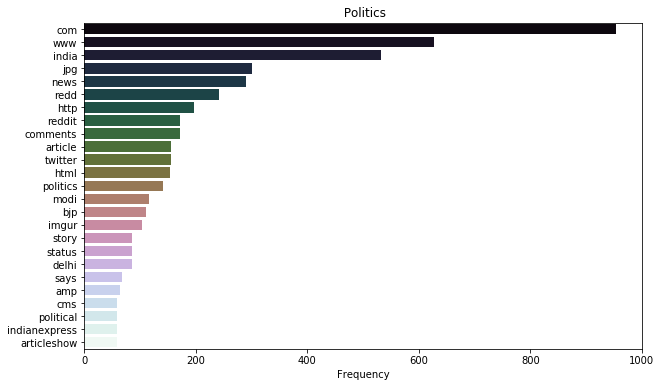

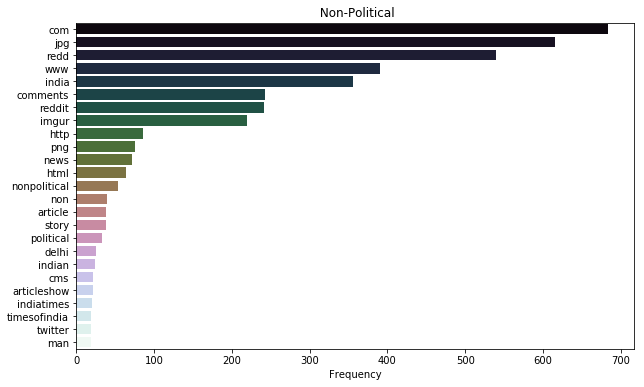

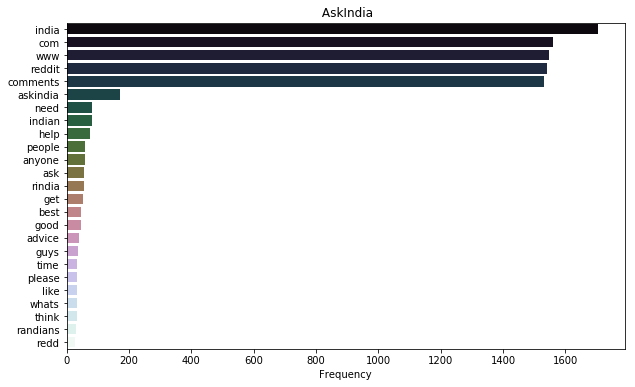

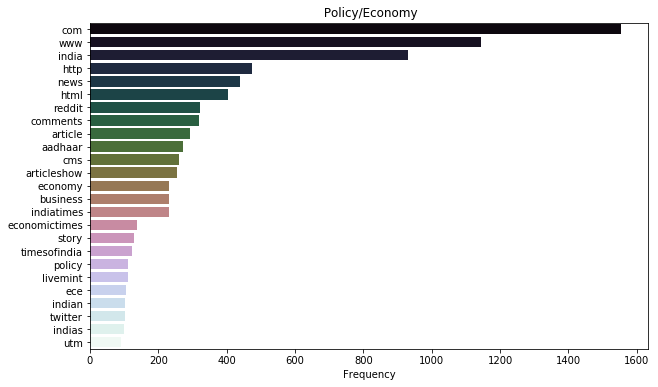

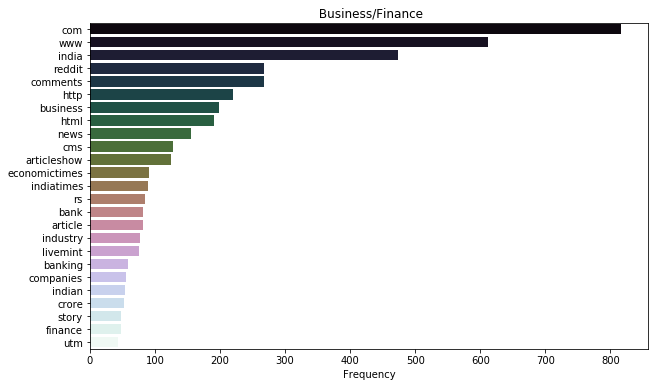

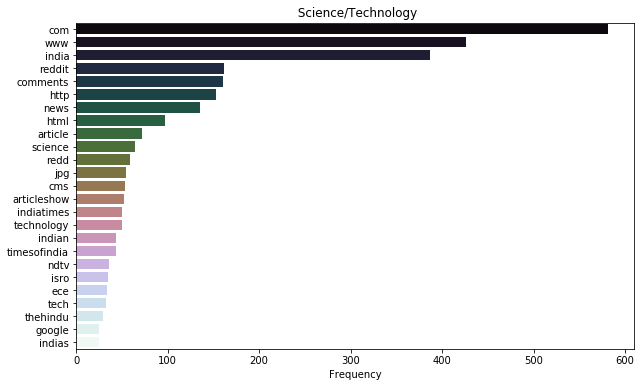

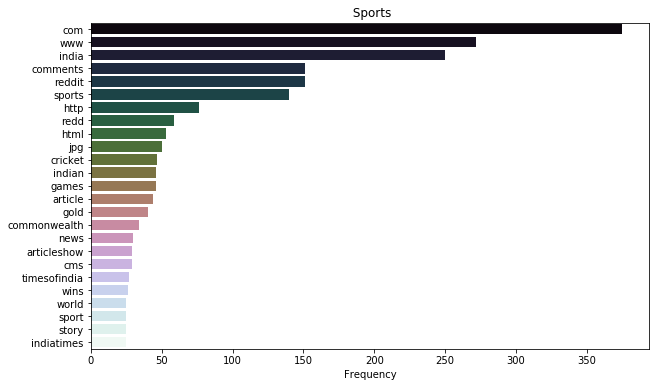

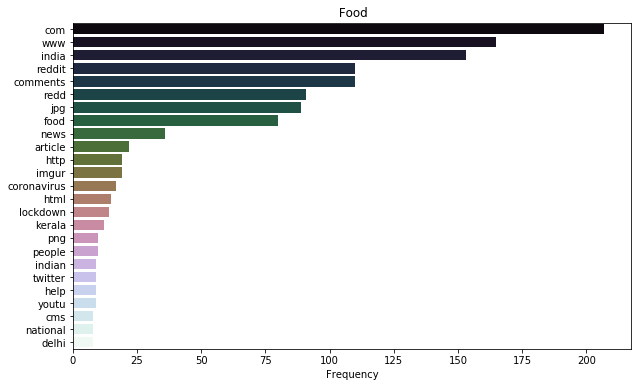

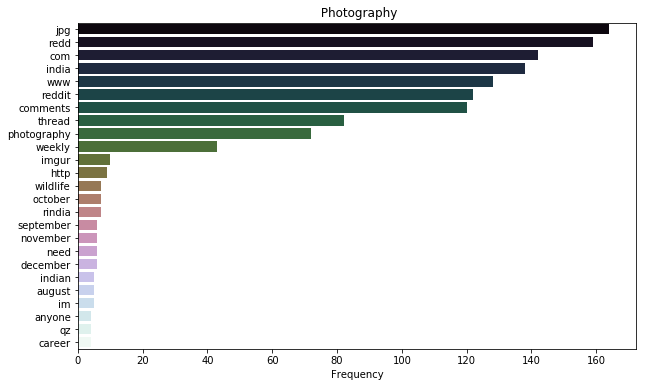

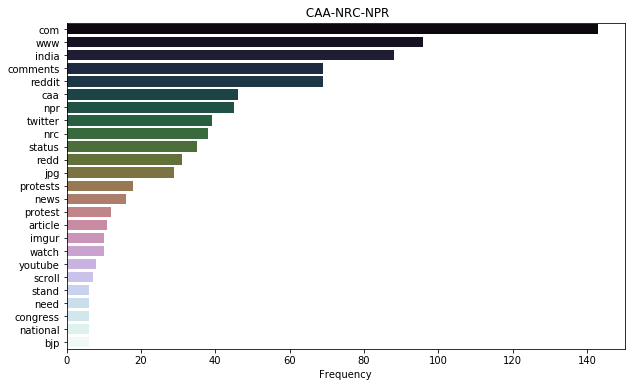

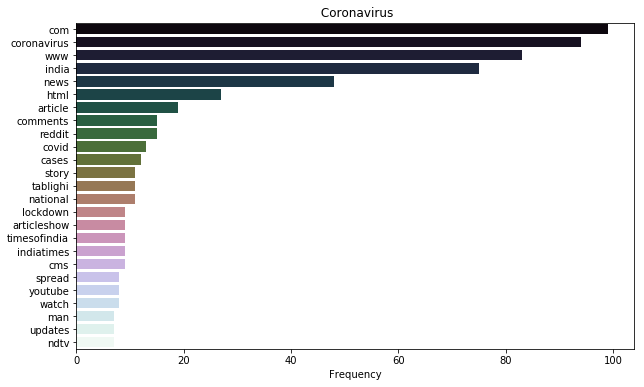

In [72]:
plot_word_count(df2,'processed_url')

In [81]:
stems=['com','www','india','reddit','http','html','news']

In [91]:
test['stem_comments_length']=test['stem_comments'].apply(len)

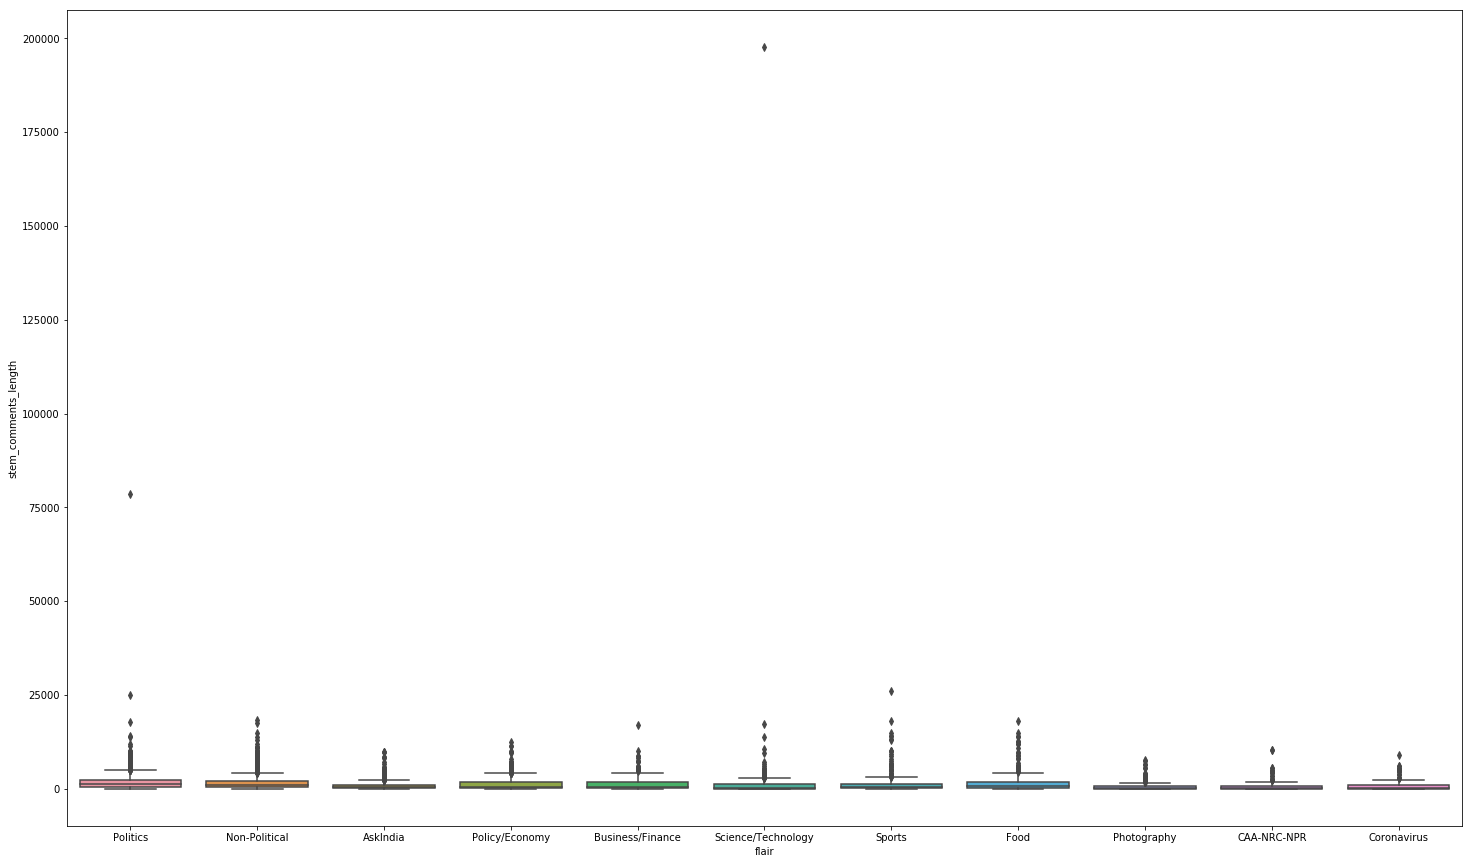

In [93]:
plt.figure(figsize=(25,15))
sns.boxplot(x='flair',y='stem_comments_length',data=test)

In [96]:
test=test.drop(test[test['stem_comments_length']>25000].index)

In [97]:
test.to_csv('outlier_removed.csv')

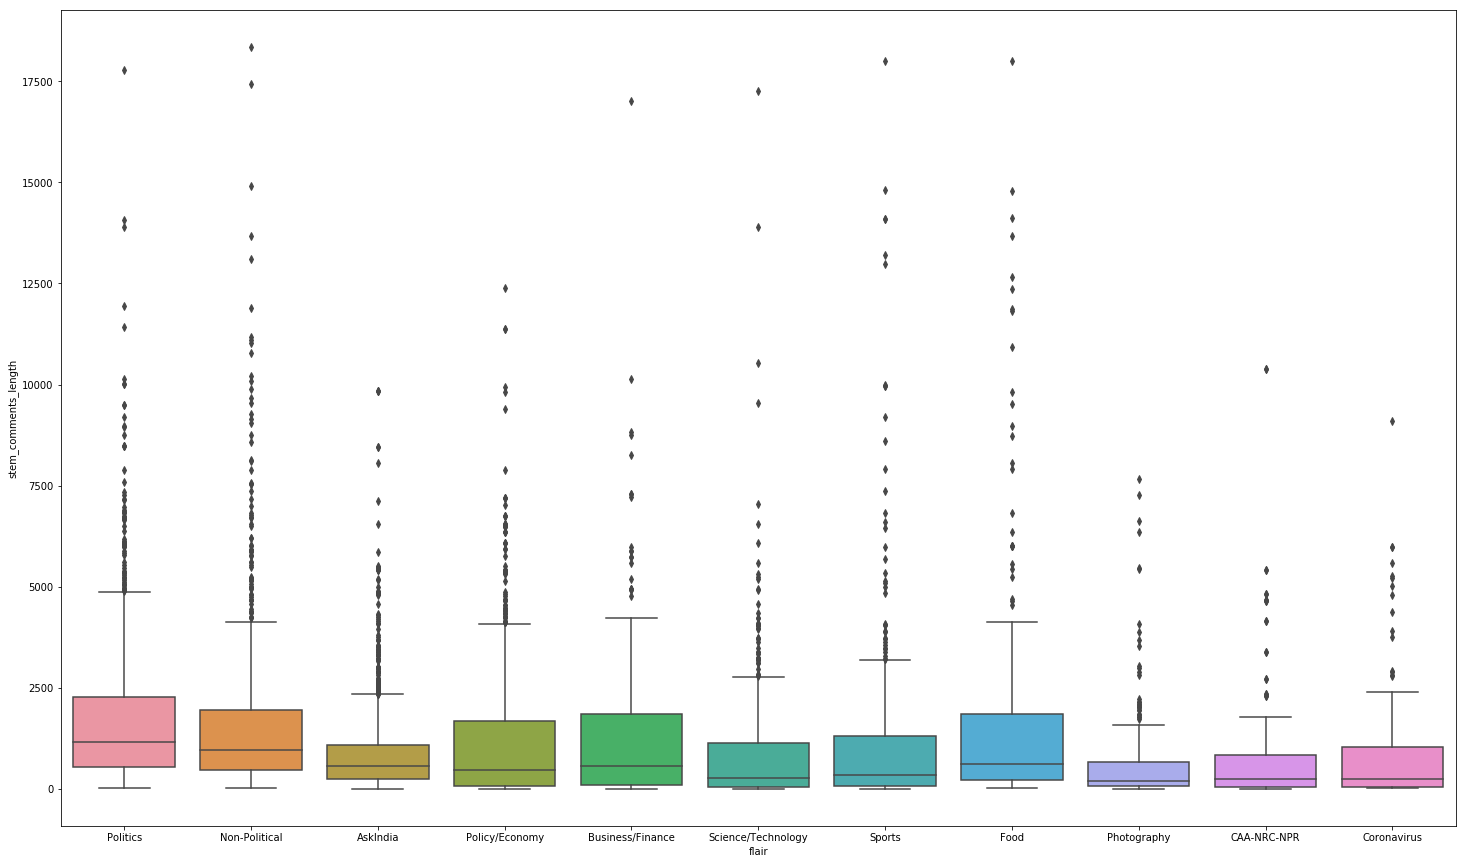

In [98]:
plt.figure(figsize=(25,15))
sns.boxplot(x='flair',y='stem_comments_length',data=test)

No particular flair has a unique comment section length. 